In [7]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# Loading data
file_path = Path('../Data/austin_house_listings.csv')
df = pd.read_csv(file_path)
df = df[df['ListPrice'] != 0]
df = df.drop('Unnamed: 0', axis=1)
df.head(10)

,BedroomsTotal,PhotosCount,FireplacesTotal,ViewYN,GarageYN,ListPrice,AssociationYN,StreetNumber,CoveredSpaces,AttachedGarageYN,...,LotFeatures_6,LotFeatures_7,LotFeatures_8,LotFeatures_9,ConstructionMaterials_0,ConstructionMaterials_1,ConstructionMaterials_2,ConstructionMaterials_3,ConstructionMaterials_4,UnparsedAddress
1,2,22,1,1,0,200000,1,6801,1,1,...,0,0,0,0,1,1,0,0,0,"6801 Beckett RD # 101R, Austin TX 78749"
3,3,23,1,0,1,200000,1,8518,2,1,...,0,0,0,0,1,1,1,0,0,"8518 Cahill DR # 58, Austin TX 78729"
7,3,18,1,1,1,500000,1,401,1,0,...,0,0,0,0,1,1,0,0,0,"401 Island DR # 1, Horseshoe Bay TX 78657"
19,2,25,1,1,0,200000,1,3601,0,0,...,0,0,0,0,1,0,0,0,0,"3601 Manchaca RD # 117, Austin TX 78704"
22,2,16,1,0,0,200000,1,12212,2,1,...,0,0,0,0,1,1,1,1,0,"12212 Brigadoon LN # 147, Austin TX 78727"
30,2,25,1,0,0,100000,1,1202,0,0,...,0,0,0,0,1,0,0,0,0,"1202 Thorpe LN # 712, San Marcos TX 78666"
31,3,1,0,1,1,200000,1,2404,1,0,...,0,0,0,0,1,1,1,1,0,"2404 Claret CV, Austin TX 78748"
36,1,25,0,1,1,400000,1,210,1,0,...,0,0,0,0,1,0,0,0,0,"210 Lavaca ST # 3109, Austin TX 78701"
48,3,8,0,0,1,500000,1,2612,2,0,...,0,0,0,0,1,0,0,0,0,"2612 12th ST # 305, Austin TX 78703"
49,5,25,1,0,1,800000,1,1036,2,1,...,0,0,0,0,1,0,0,0,0,"1036 Liberty Park DR # 20, Austin TX 78746"


In [33]:
Address = df.pop('UnparsedAddress')

In [34]:
# Standarize data with StandarScaler
data_scaled = StandardScaler().fit_transform(df)
print(data_scaled[0:5])

[[-0.05404037  1.65650123  0.79745513 ... -0.437893   -0.23215121
  -0.10654992]
 [ 1.1927759   1.77595616  0.79745513 ...  2.28366291 -0.23215121
  -0.10654992]
 [ 1.1927759   1.17868153  0.79745513 ... -0.437893   -0.23215121
  -0.10654992]
 [-0.05404037  2.01486601  0.79745513 ... -0.437893   -0.23215121
  -0.10654992]
 [-0.05404037  0.93977168  0.79745513 ...  2.28366291  4.30753735
  -0.10654992]]


In [35]:
#sns.heatmap(pd.DataFrame(data_scaled).corr())

Text(0, 0.5, 'cumulative explained variance')

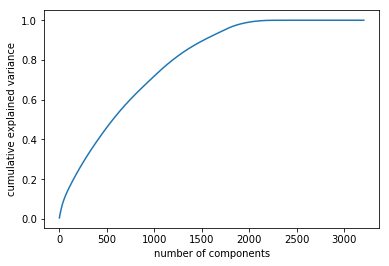

In [37]:
pca = PCA().fit(data_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Text(0, 0.5, 'cumulative explained variance')

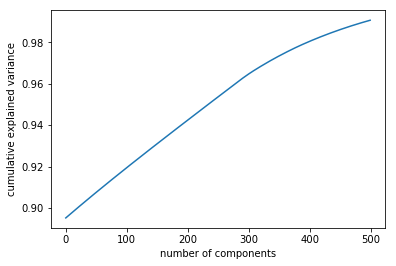

In [38]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)[1500:2000])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [68]:
# Applying PCA to reduce dimensions

# Initialize PCA model
pca = PCA(n_components=10)

# Get principal components
data_pca = pca.fit_transform(data_scaled)

In [69]:
df_pca = pd.DataFrame(data=data_pca)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.225188,-1.344499,0.679729,0.271326,0.403982,0.835344,-0.422060,0.499781,-0.186176,-0.774241
1,-2.545764,4.641485,-8.462595,1.545655,-3.028444,-2.775093,-1.444886,1.000464,-0.838711,0.521165
2,4.536346,12.317755,9.689398,6.245774,-10.840503,-3.894823,-4.015914,-9.985109,-1.890008,3.454401
3,-1.117240,0.397215,1.152013,-1.267604,2.166996,-0.446516,0.096450,-1.194290,0.576068,0.565926
4,-1.106023,-0.358578,-0.328701,0.503753,0.763275,0.290332,-0.499306,0.127616,0.386651,-0.448131


In [70]:
# Finding the best value for k
inertia = []
k = list(range(1, 31))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

:Curve   [k]   (inertia)

In [75]:
# Predicting clusters 

# Initialize the K-Means model
model = KMeans(n_clusters=14)

# Fit the model
model.fit(df_pca)

# Predict clusters
predictions = model.predict(df_pca)

# Add the predicted class columns
df_pca["class"] = model.labels_
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,class
0,-1.225188,-1.344499,0.679729,0.271326,0.403982,0.835344,-0.422060,0.499781,-0.186176,-0.774241,1
1,-2.545764,4.641485,-8.462595,1.545655,-3.028444,-2.775093,-1.444886,1.000464,-0.838711,0.521165,9
2,4.536346,12.317755,9.689398,6.245774,-10.840503,-3.894823,-4.015914,-9.985109,-1.890008,3.454401,3
3,-1.117240,0.397215,1.152013,-1.267604,2.166996,-0.446516,0.096450,-1.194290,0.576068,0.565926,8
4,-1.106023,-0.358578,-0.328701,0.503753,0.763275,0.290332,-0.499306,0.127616,0.386651,-0.448131,8


In [76]:
#df_pca.groupby(by = 'class').describe()

In [77]:
df['class'] = df_pca['class']
df.head()

,BedroomsTotal,PhotosCount,FireplacesTotal,ViewYN,GarageYN,ListPrice,AssociationYN,StreetNumber,CoveredSpaces,AttachedGarageYN,...,LotFeatures_6,LotFeatures_7,LotFeatures_8,LotFeatures_9,ConstructionMaterials_0,ConstructionMaterials_1,ConstructionMaterials_2,ConstructionMaterials_3,ConstructionMaterials_4,class
1,2,22,1,1,0,200000,1,6801,1,1,...,0,0,0,0,1,1,0,0,0,9.0
3,3,23,1,0,1,200000,1,8518,2,1,...,0,0,0,0,1,1,1,0,0,8.0
7,3,18,1,1,1,500000,1,401,1,0,...,0,0,0,0,1,1,0,0,0,1.0
19,2,25,1,1,0,200000,1,3601,0,0,...,0,0,0,0,1,0,0,0,0,9.0
22,2,16,1,0,0,200000,1,12212,2,1,...,0,0,0,0,1,1,1,1,0,1.0


In [78]:
df[['ListPrice', 'class', 'BedroomsTotal']].groupby(by = 'class').describe()

ListPrice                                                              \
          count           mean            std       min       25%       50%   
class                                                                         
0.0        20.0  207500.000000  153995.044350   60000.0  100000.0  200000.0   
1.0       521.0  224107.485605  209846.143184   30000.0  100000.0  200000.0   
2.0         1.0  200000.000000            NaN  200000.0  200000.0  200000.0   
3.0        13.0  218461.538462  100485.998514   40000.0  200000.0  200000.0   
4.0         2.0  200000.000000  141421.356237  100000.0  150000.0  200000.0   
5.0        35.0  244285.714286  192266.446773   50000.0  100000.0  200000.0   
7.0         2.0  280000.000000  311126.983722   60000.0  170000.0  280000.0   
8.0       243.0  203497.942387  130367.039847   40000.0  100000.0  200000.0   
9.0       105.0  213333.333333  216957.398630   40000.0  100000.0  200000.0   
10.0        8.0  325000.000000  148804.761829  100000.0  200000.0  350000.0   
12.0        2.0  250000.000000  212132.034356  100000.0  175000.0  250000.0   

                           BedroomsTotal                                      \
            75%        max         count      mean       std  min   25%  50%   
class                                                                          
0.0    225000.0   700000.0          20.0  2.000000  0.794719  1.0  1.75  2.0   
1.0    300000.0  2000000.0         521.0  2.126679  0.766660  0.0  2.00  2.0   
2.0    200000.0   200000.0           1.0  2.000000       NaN  2.0  2.00  2.0   
3.0    300000.0   400000.0          13.0  2.076923  0.759555  1.0  2.00  2.0   
4.0    250000.0   300000.0           2.0  2.000000  0.000000  2.0  2.00  2.0   
5.0    300000.0  1000000.0          35.0  2.114286  0.795998  0.0  2.00  2.0   
7.0    390000.0   500000.0           2.0  2.500000  0.707107  2.0  2.25  2.5   
8.0    300000.0   800000.0         243.0  2.152263  0.841502  1.0  2.00  2.0   
9.0    300000.0  2000000.0         105.0  2.161905  0.748380  1.0  2.00  2.0   
10.0   425000.0   500000.0           8.0  2.500000  0.534522  2.0  2.00  2.5   
12.0   325000.0   400000.0           2.0  3.000000  0.000000  3.0  3.00  3.0   

                  
        75%  max  
class             
0.0    2.00  4.0  
1.0    3.00  5.0  
2.0    2.00  2.0  
3.0    3.00  3.0  
4.0    2.00  2.0  
5.0    3.00  3.0  
7.0    2.75  3.0  
8.0    3.00  5.0  
9.0    3.00  4.0  
10.0   3.00  3.0  
12.0   3.00  3.0

In [82]:
df[df['class']==7].T.head(1000)

,1165,1599
BedroomsTotal,3.0,2.0
PhotosCount,9.0,0.0
FireplacesTotal,1.0,0.0
ViewYN,0.0,0.0
GarageYN,1.0,0.0
ListPrice,500000.0,60000.0
AssociationYN,0.0,1.0
StreetNumber,2101.0,1015.0
CoveredSpaces,1.0,0.0
AttachedGarageYN,1.0,0.0
